<a href="https://colab.research.google.com/github/emiliamusso/scraper/blob/main/scraper_hidden_apis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios APIs Ocultas

# Argenprop

Elegir un departamento en palermo que les guste desde [este link](https://www.argenprop.com/departamento-venta-barrio-palermo) y descargar sus datos utilizando la API oculta de argenprop.


In [ ]:
import requests
import re

# Elegi el departamento con este link
departamento_link = 'https://www.argenprop.com/departamento-en-venta-en-palermo-hollywood-4-ambientes--12071730'
api_url = 'https://api.sosiva451.com/avisos/{id}'

departamento_id = re.findall(r'--(\d+)', departamento_link)[0]

response = requests.get(api_url.format(id=departamento_id)).json()

In [ ]:
# Revisar los valores
for row, valor in response.items():
  print(f'{row:<28}: {valor}')

In [ ]:
def get_depto_info(contenido):
  """
  Extrae los datos de las columnas de interes del contenido de un departamento
  Devuelve un diccionario con los resultados
  """
  columnas_interes = [
      'IdAviso', 'TipoPropiedad_t', 'TipoOperacion_t', 'FechaPublicacionAviso_dt',
      'MontoNormalizado_d', 'SuperficieCubierta_d', 'SuperficieTotal_d',
      'Titulo_t', 'Direccion_NombreCalle_t', 'Direccion_Numero_i',
      'Barrio_t', 'Localidad_t', 'Provincia_t',
      'Pais_t','CantidadDormitorios_i', 'CantidadAmbientes_i',
      'TelefonoWhatsApp_i', 'Direccion_Latitud_d', 'Direccion_Longitud_d'
    ]
  data = dict()
  for row, valor in contenido.items():
    if row in columnas_interes:
      data[row] = valor

  return data

data = get_depto_info(response)

In [ ]:
data

{'IdAviso': 12071730,
 'TipoPropiedad_t': 'Departamento',
 'TipoOperacion_t': 'Venta',
 'MontoNormalizado_d': 200000.0,
 'SuperficieCubierta_d': 150.0,
 'SuperficieTotal_d': 150.0,
 'Titulo_t': 'Espec Depto! M/lum! Excel Distrib! T/exter! Patio! Toil! S/expen! P/blindada! Lav indep! Apto! OPORT',
 'Barrio_t': 'Palermo',
 'Localidad_t': 'Capital Federal',
 'Provincia_t': 'Capital Federal',
 'Pais_t': 'Argentina',
 'Direccion_NombreCalle_t': 'Bonpland',
 'Direccion_Numero_i': 2400,
 'Direccion_Latitud_d': -34.577451,
 'Direccion_Longitud_d': -58.430507,
 'FechaPublicacionAviso_dt': '2022-10-27T19:27:49Z',
 'CantidadDormitorios_i': 3,
 'CantidadAmbientes_i': 4,
 'TelefonoWhatsApp_i': '5491139136402'}

In [ ]:
import pandas as pd

data = {
    'IdAviso': [12071730],
    'TipoPropiedad_t': ['Departamento'],
    'TipoOperacion_t': ['Venta'],
    'MontoNormalizado_d': [200000.0],
    'SuperficieCubierta_d': [150.0],
    'SuperficieTotal_d': [150.0],
    'Titulo_t': ['Espec Depto! M/lum! Excel Distrib! T/exter! Patio! Toil! S/expen! P/blindada! Lav indep! Apto! OPORT'],
    'Barrio_t': ['Palermo'],
    'Localidad_t': ['Capital Federal'],
    'Provincia_t': ['Capital Federal'],
    'Pais_t': ['Argentina'],
    'Direccion_NombreCalle_t': ['Bonpland'],
    'Direccion_Numero_i': [2400],
    'Direccion_Latitud_d': [-34.577451],
    'Direccion_Longitud_d': [-58.430507],
    'FechaPublicacionAviso_dt': ['2022-10-27T19:27:49Z'],
    'CantidadDormitorios_i': [3],
    'CantidadAmbientes_i': [4],
    'TelefonoWhatsApp_i': ['5491139136402']
}

df = pd.DataFrame(data)

In [ ]:
df.head()

,IdAviso,TipoPropiedad_t,TipoOperacion_t,MontoNormalizado_d,SuperficieCubierta_d,SuperficieTotal_d,Titulo_t,Barrio_t,Localidad_t,Provincia_t,Pais_t,Direccion_NombreCalle_t,Direccion_Numero_i,Direccion_Latitud_d,Direccion_Longitud_d,FechaPublicacionAviso_dt,CantidadDormitorios_i,CantidadAmbientes_i,TelefonoWhatsApp_i
0,12071730,Departamento,Venta,200000.0,150.0,150.0,Espec Depto! M/lum! Excel Distrib! T/exter! Pa...,Palermo,Capital Federal,Capital Federal,Argentina,Bonpland,2400,-34.577451,-58.430507,2022-10-27T19:27:49Z,3,4,5491139136402


In [ ]:
df.columns

Index(['IdAviso', 'TipoPropiedad_t', 'TipoOperacion_t', 'MontoNormalizado_d',
       'SuperficieCubierta_d', 'SuperficieTotal_d', 'Titulo_t', 'Barrio_t',
       'Localidad_t', 'Provincia_t', 'Pais_t', 'Direccion_NombreCalle_t',
       'Direccion_Numero_i', 'Direccion_Latitud_d', 'Direccion_Longitud_d',
       'FechaPublicacionAviso_dt', 'CantidadDormitorios_i',
       'CantidadAmbientes_i', 'TelefonoWhatsApp_i'],
      dtype='object')

In [ ]:
new_data = [
    {'IdAviso': 6663543, 'TipoOperacion_t': 'Venta', 'TipoPropiedad_t': 'Departamento', 'Localidad_t': 'Capital Federal', 'Barrio_t': 'Palermo', 'MontoNormalizado_d': 170000.0, 'Titulo_t': 'dos ambientes en duplex', 'Direccion_NombreCalle_t': 'Niceto Vega  5700'},
    {'IdAviso': 6645138, 'TipoOperacion_t': 'Venta', 'TipoPropiedad_t': 'Departamento', 'Localidad_t': 'Capital Federal', 'Barrio_t': 'Palermo', 'MontoNormalizado_d': 152000.0, 'Titulo_t': 'Excelente 2amb,vista abierta! Categoria,Carranza 2200', 'Direccion_NombreCalle_t': 'Carranza'},
    {'IdAviso': 6470556, 'TipoOperacion_t': 'Venta', 'TipoPropiedad_t': 'Departamento', 'Localidad_t': 'Capital Federal', 'Barrio_t': 'Palermo', 'MontoNormalizado_d': 160000.0, 'Titulo_t': 'RETASADO!!!!! AMPLIO 2MB CON COCHERA FIJA', 'Direccion_NombreCalle_t': 'Charcas'},
    {'IdAviso': 6562362, 'TipoOperacion_t': 'Venta', 'TipoPropiedad_t': 'Departamento', 'Localidad_t': 'Capital Federal', 'Barrio_t': 'Palermo', 'MontoNormalizado_d': 159799.0, 'Titulo_t': 'CORDOBA 5515 - DEPTO MONOAMB DIVISIBLE A ESTRENAR CON PATIO', 'Direccion_NombreCalle_t': 'Cordoba  5500 1°'},
    {'IdAviso': 6565535, 'TipoOperacion_t': 'Venta', 'TipoPropiedad_t': 'Departamento', 'Localidad_t': 'Capital Federal', 'Barrio_t': 'Palermo', 'MontoNormalizado_d': 184105.0, 'Titulo_t': 'Departamento - Palermo Hollywood', 'Direccion_NombreCalle_t': 'Bonpland 2187 2do B'}
]

df = df.append(new_data, ignore_index=True)

<ipython-input-18-e23a80054fd0>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data, ignore_index=True)


In [ ]:
df.head()

,IdAviso,TipoPropiedad_t,TipoOperacion_t,MontoNormalizado_d,SuperficieCubierta_d,SuperficieTotal_d,Titulo_t,Barrio_t,Localidad_t,Provincia_t,Pais_t,Direccion_NombreCalle_t,Direccion_Numero_i,Direccion_Latitud_d,Direccion_Longitud_d,FechaPublicacionAviso_dt,CantidadDormitorios_i,CantidadAmbientes_i,TelefonoWhatsApp_i
0,12071730,Departamento,Venta,200000.0,150.0,150.0,Espec Depto! M/lum! Excel Distrib! T/exter! Pa...,Palermo,Capital Federal,Capital Federal,Argentina,Bonpland,2400.0,-34.577451,-58.430507,2022-10-27T19:27:49Z,3.0,4.0,5491139136402
1,6663543,Departamento,Venta,170000.0,NaN,NaN,dos ambientes en duplex,Palermo,Capital Federal,NaN,NaN,Niceto Vega 5700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6645138,Departamento,Venta,152000.0,NaN,NaN,"Excelente 2amb,vista abierta! Categoria,Carran...",Palermo,Capital Federal,NaN,NaN,Carranza,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6470556,Departamento,Venta,160000.0,NaN,NaN,RETASADO!!!!! AMPLIO 2MB CON COCHERA FIJA,Palermo,Capital Federal,NaN,NaN,Charcas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6562362,Departamento,Venta,159799.0,NaN,NaN,CORDOBA 5515 - DEPTO MONOAMB DIVISIBLE A ESTRE...,Palermo,Capital Federal,NaN,NaN,Cordoba 5500 1°,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = pd.DataFrame(df,columns=["MontoNormalizado_d"])
data.head()

,MontoNormalizado_d
0,200000.0
1,170000.0
2,152000.0
3,160000.0
4,159799.0


<Axes: >

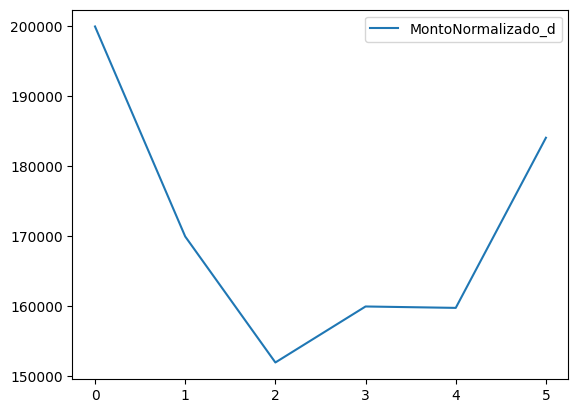

In [ ]:
data.plot()

In [ ]:
# Trabajar con las publicaciones similares
# Se arma una lista con la misma informacion
api_similares_url = 'https://api.sosiva451.com/avisos/similares/{id}'
response_similares = requests.get(api_similares_url.format(id=departamento_id)).json()

data_similares = [get_depto_info(depto_info) for depto_info in response_similares['Results']]
data_similares

[{'IdAviso': 6663543,
  'TipoOperacion_t': 'Venta',
  'TipoPropiedad_t': 'Departamento',
  'Localidad_t': 'Capital Federal',
  'Barrio_t': 'Palermo',
  'MontoNormalizado_d': 170000.0,
  'Titulo_t': 'dos ambientes en duplex',
  'Direccion_NombreCalle_t': 'Niceto Vega  5700'},
 {'IdAviso': 6645138,
  'TipoOperacion_t': 'Venta',
  'TipoPropiedad_t': 'Departamento',
  'Localidad_t': 'Capital Federal',
  'Barrio_t': 'Palermo',
  'MontoNormalizado_d': 152000.0,
  'Titulo_t': 'Excelente 2amb,vista abierta! Categoria,Carranza 2200',
  'Direccion_NombreCalle_t': 'Carranza'},
 {'IdAviso': 6470556,
  'TipoOperacion_t': 'Venta',
  'TipoPropiedad_t': 'Departamento',
  'Localidad_t': 'Capital Federal',
  'Barrio_t': 'Palermo',
  'MontoNormalizado_d': 160000.0,
  'Titulo_t': 'RETASADO!!!!! AMPLIO 2MB CON COCHERA FIJA',
  'Direccion_NombreCalle_t': 'Charcas'},
 {'IdAviso': 6562362,
  'TipoOperacion_t': 'Venta',
  'TipoPropiedad_t': 'Departamento',
  'Localidad_t': 'Capital Federal',
  'Barrio_t': 'Pal